In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/Walmart.csv')
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


* Total Number of orders made from each state
* Total quantity sold from each category
* Number of orders of each category from each state
* Total quantity sold from each category from each state
* Average of sales and profit made by each category
* Total of sales profit made by each category
* Processing time of each order -> difference between ship date and order date
* Total sales and profit made in each year

In [ ]:
df['State'].unique()

array(['California', 'Washington', 'Utah', 'Arizona', 'Oregon',
       'Colorado', 'New Mexico', 'Nevada', 'Montana', 'Idaho', 'Wyoming'],
      dtype=object)

In [ ]:
df['State'].value_counts()

State
California    2001
Washington     506
Arizona        224
Colorado       182
Oregon         124
Utah            53
Nevada          39
New Mexico      37
Idaho           21
Montana         15
Wyoming          1
Name: count, dtype: int64

In [ ]:
df.groupby('Category')['Quantity'].sum()

Category
Accessories    1032.0
Appliances      492.0
Art             926.0
Binders        1868.0
Bookcases       306.0
Chairs          734.0
Copiers          88.0
Envelopes       227.0
Fasteners       263.0
Furnishings    1175.0
Labels          480.0
Machines        147.0
Paper          1702.0
Phones         1066.0
Storage        1039.0
Supplies        238.0
Tables          481.0
Name: Quantity, dtype: float64

In [ ]:
df.head(3)

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97


In [ ]:
#number of orders of each category from each state

df.groupby('State')['Category'].value_counts()

State       Category   
Arizona     Binders        35
            Paper          31
            Phones         23
            Accessories    22
            Furnishings    21
                           ..
Washington  Supplies        9
            Machines        7
            Envelopes       6
            Copiers         5
Wyoming     Chairs          1
Name: count, Length: 141, dtype: int64

In [ ]:
#df_state_category = df.groupby('State')['Category'].value_counts().unstack().fillna(0)

df_state_category = pd.crosstab(df['State'] , df['Category'])

df_state_category

Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
State,,,,,,,,,,,,,,,,,
Arizona,22,6,14,35,3,16,0,7,6,21,3,3,31,23,21,4,9
California,147,94,165,276,52,130,17,46,42,191,83,23,289,172,160,43,71
Colorado,15,9,11,28,9,14,1,5,4,24,2,3,19,16,13,5,4
Idaho,1,1,0,5,0,1,0,0,0,3,0,0,4,3,1,0,2
Montana,1,0,0,3,0,0,1,0,0,1,1,0,2,2,4,0,0
Nevada,2,2,4,7,1,1,0,0,1,5,1,1,7,3,1,1,2
New Mexico,5,0,4,5,0,2,0,1,0,2,1,0,7,4,4,2,0
Oregon,10,6,14,14,3,8,0,2,2,5,6,2,21,15,7,4,5
Utah,2,1,4,12,2,0,1,0,2,3,2,0,11,4,6,1,2


In [ ]:
#Total quantity sold from each category from each state
#Category
#State
#Quantity

df_state_cat_quantity = df.groupby(['State','Category'])['Quantity'].sum().unstack().fillna(0)
df_state_cat_quantity.head(3)

Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
State,,,,,,,,,,,,,,,,,
Arizona,85.0,21.0,47.0,155.0,18.0,52.0,0.0,28.0,23.0,82.0,9.0,9.0,124.0,79.0,78.0,16.0,36.0
California,568.0,346.0,644.0,1057.0,198.0,466.0,60.0,149.0,148.0,751.0,349.0,86.0,1091.0,689.0,637.0,145.0,281.0
Colorado,76.0,38.0,32.0,112.0,41.0,53.0,1.0,16.0,12.0,92.0,5.0,13.0,64.0,59.0,51.0,14.0,14.0


In [ ]:
#Average of sales and profit made by each category

df.groupby('Category')[['Sales','Profit']].mean()

,Sales,Profit
Category,,
Accessories,236.876357,63.893876
Appliances,222.325882,60.744779
Art,36.848240,9.496600
Binders,118.813397,34.175754
Bookcases,450.052250,-20.581250
Chairs,491.697391,19.457101
Copiers,1989.969200,773.090000
Envelopes,61.464179,28.488209
Fasteners,12.822222,3.822083


In [ ]:
#Total of sales profit made by each category

df.groupby('Category')[['Sales','Profit']].sum()

,Sales,Profit
Category,,
Accessories,61114.10,16484.62
Appliances,30236.32,8261.29
Art,9212.06,2374.15
Binders,55961.11,16096.78
Bookcases,36004.18,-1646.50
Chairs,101781.36,4027.62
Copiers,49749.23,19327.25
Envelopes,4118.10,1908.71
Fasteners,923.20,275.19


In [ ]:
df.head(3)

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97


In [ ]:
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Customer Name     object
Country           object
City              object
State             object
Category          object
Product Name      object
Sales            float64
Quantity         float64
Profit           float64
dtype: object

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

<ipython-input-14-9d9e7d6e3ad3>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
<ipython-input-14-9d9e7d6e3ad3>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [ ]:
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Customer Name            object
Country                  object
City                     object
State                    object
Category                 object
Product Name             object
Sales                   float64
Quantity                float64
Profit                  float64
dtype: object

In [ ]:
#Processing time of each order -> difference between ship date and order date
df['ProcessingTime'] = df['Ship Date'] - df['Order Date']

In [ ]:
df.head(3)

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,ProcessingTime
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,4 days
1,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,5 days
2,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,5 days


In [ ]:
#Total sales and profit made in each year

df['OrderYear'] = df['Order Date'].dt.year
df['OrderMonth'] = df['Order Date'].dt.month
df['OrderDay'] = df['Order Date'].dt.day

In [ ]:
df.head(3)

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,ProcessingTime,OrderYear,OrderMonth,OrderDay
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,4 days,2013,6,13
1,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,5 days,2011,6,9
2,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,5 days,2011,6,9


In [ ]:
df.groupby('OrderYear')[['Sales','Profit']].sum()

,Sales,Profit
OrderYear,,
2011,147883.07,20065.74
2012,139966.24,20492.17
2013,186976.09,23959.90
2014,250632.53,43900.98


In [ ]:
df.head(3)

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,ProcessingTime,OrderYear,OrderMonth,OrderDay
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,4 days,2013,6,13
1,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,5 days,2011,6,9
2,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,5 days,2011,6,9


In [ ]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Customer Name', 'Country',
       'City', 'State', 'Category', 'Product Name', 'Sales', 'Quantity',
       'Profit', 'ProcessingTime', 'OrderYear', 'OrderMonth', 'OrderDay'],
      dtype='object')

In [ ]:
reordered_columns = ['Order ID', 'Order Date', 'Ship Date', 'ProcessingTime', 'OrderYear',
                     'OrderMonth', 'OrderDay','Customer Name', 'Country', 'City', 'State',
                     'Category', 'Product Name', 'Sales', 'Quantity','Profit']

df = df.reindex(columns=reordered_columns)
df.head(3)

,Order ID,Order Date,Ship Date,ProcessingTime,OrderYear,OrderMonth,OrderDay,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,4 days,2013,6,13,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,2011-06-09,2011-06-14,5 days,2011,6,9,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,2011-06-09,2011-06-14,5 days,2011,6,9,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97


In [ ]:
df_category_quantity = df.groupby('Category')['Quantity'].sum().reset_index()
df_category_quantity

,Category,Quantity
0,Accessories,1032.0
1,Appliances,492.0
2,Art,926.0
3,Binders,1868.0
4,Bookcases,306.0
5,Chairs,734.0
6,Copiers,88.0
7,Envelopes,227.0
8,Fasteners,263.0
9,Furnishings,1175.0


<Axes: xlabel='Category'>

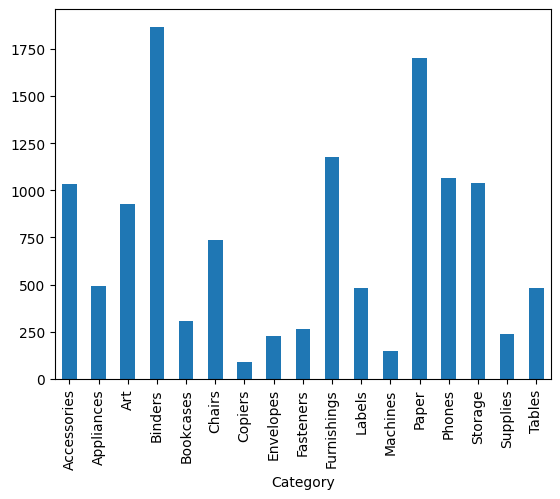

In [ ]:
df.groupby('Category')['Quantity'].sum().plot.bar()

In [ ]:
df_category_order_count = df['Category'].value_counts().reset_index()
df_category_order_count

,Category,count
0,Binders,471
1,Paper,450
2,Furnishings,304
3,Phones,277
4,Storage,266
5,Accessories,258
6,Art,250
7,Chairs,207
8,Appliances,136
9,Labels,116


<Axes: xlabel='Category'>

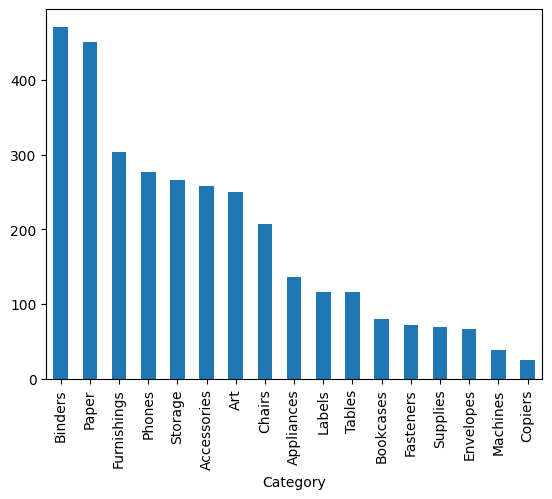

In [ ]:
df['Category'].value_counts().plot.bar()

In [ ]:
#df_category_quantity
#df_category_order_count

#These two data frames are having one column common
#Using common column we can merge them

df_category_details = pd.merge(df_category_quantity,df_category_order_count,on='Category')
df_category_details = df_category_details.sort_values('Quantity',ascending=False)
df_category_details

,Category,Quantity,count
3,Binders,1868.0,471
12,Paper,1702.0,450
9,Furnishings,1175.0,304
13,Phones,1066.0,277
14,Storage,1039.0,266
0,Accessories,1032.0,258
2,Art,926.0,250
5,Chairs,734.0,207
1,Appliances,492.0,136
16,Tables,481.0,116


<Axes: xlabel='Category'>

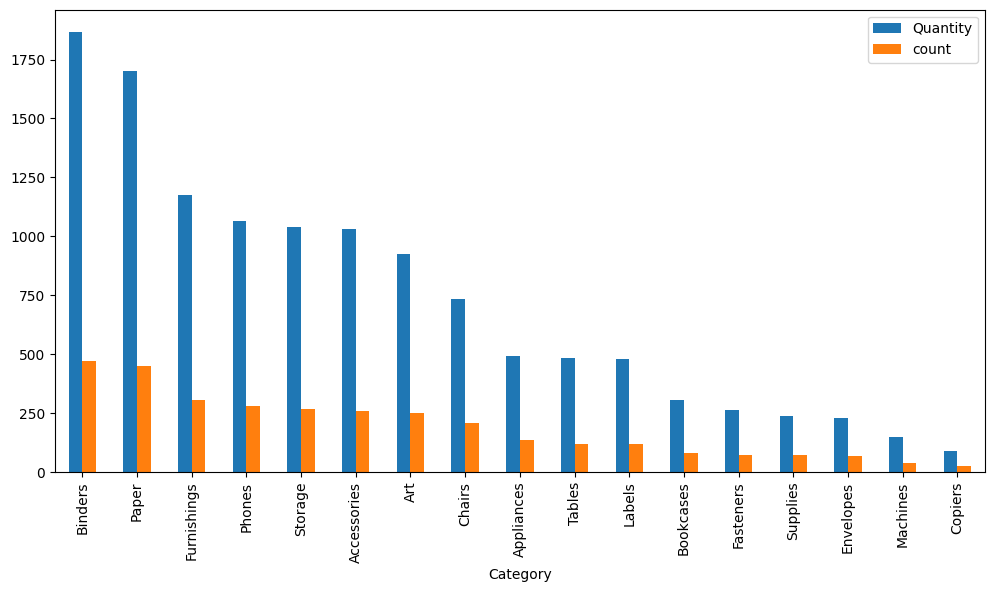

In [ ]:
df_category_details.plot.bar(x='Category' , figsize = (12,6))

<Axes: xlabel='Category'>

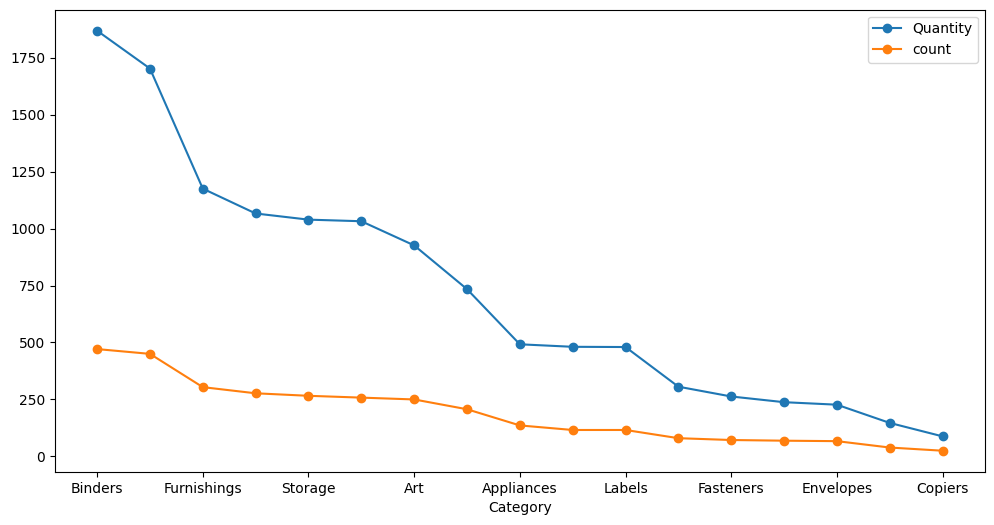

In [ ]:
df_category_details.plot.line(x='Category' , figsize = (12,6) , marker = 'o')

<Axes: xlabel='Category', ylabel='Quantity'>

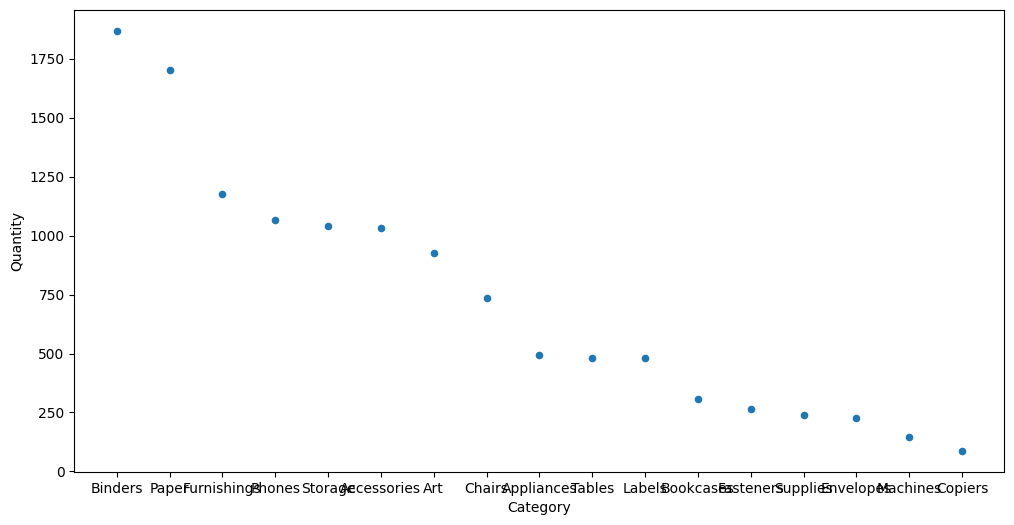

In [ ]:
df_category_details.plot.scatter(x='Category' , y = 'Quantity' , figsize = (12,6) , marker = 'o')

**Using Matplotlib for plotting**

In [ ]:
df_category_details

,Category,Quantity,count
3,Binders,1868.0,471
12,Paper,1702.0,450
9,Furnishings,1175.0,304
13,Phones,1066.0,277
14,Storage,1039.0,266
0,Accessories,1032.0,258
2,Art,926.0,250
5,Chairs,734.0,207
1,Appliances,492.0,136
16,Tables,481.0,116


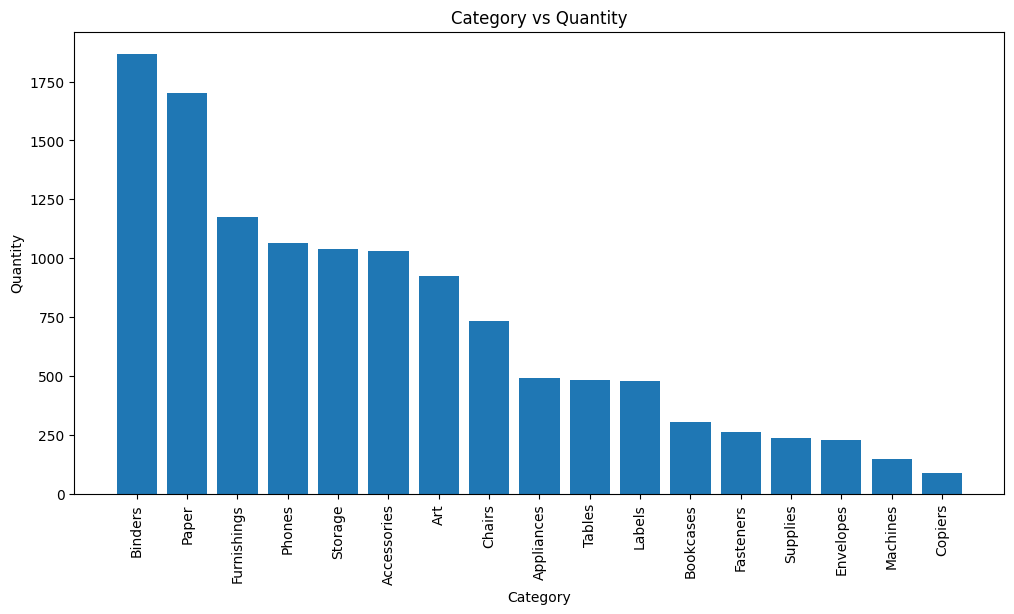

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(df_category_details['Category'],df_category_details['Quantity'])

plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Category vs Quantity')

plt.xticks(rotation = 90)

plt.show()

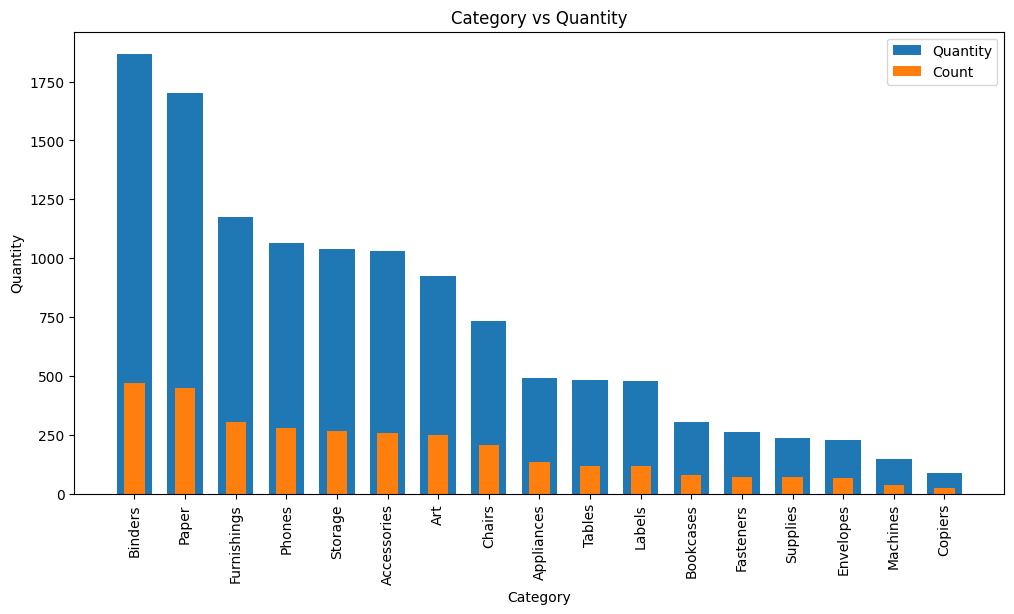

In [ ]:
plt.figure(figsize=(12,6))

plt.bar(df_category_details['Category'],df_category_details['Quantity'],width = 0.7 , label = 'Quantity')
plt.bar(df_category_details['Category'],df_category_details['count'] , width = 0.4 , label = 'Count')

plt.legend()

plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Category vs Quantity')

plt.xticks(rotation = 90)

plt.show()

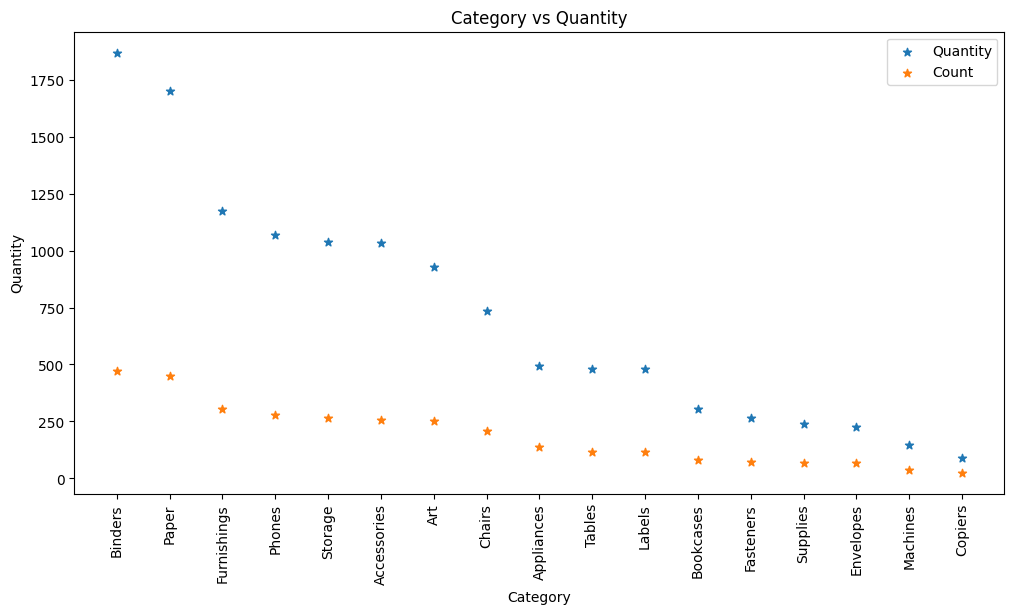

In [ ]:
plt.figure(figsize=(12,6))

plt.scatter(df_category_details['Category'],df_category_details['Quantity'] , label = 'Quantity' , marker = '*')
plt.scatter(df_category_details['Category'],df_category_details['count'] , label = 'Count' , marker = '*')

plt.legend()

plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Category vs Quantity')

plt.xticks(rotation = 90)

plt.show()

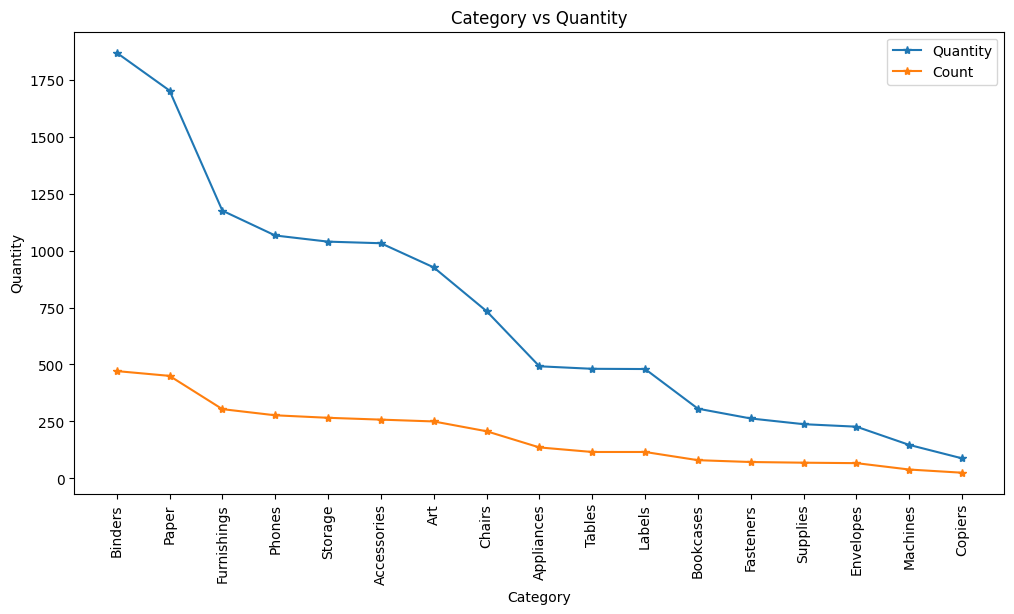

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(df_category_details['Category'],df_category_details['Quantity'] , label = 'Quantity' , marker = '*')
plt.plot(df_category_details['Category'],df_category_details['count'] , label = 'Count' , marker = '*')

plt.legend()

plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Category vs Quantity')

plt.xticks(rotation = 90)

plt.show()

In [ ]:
def profit_status(profit_value):
  if profit_value > 0:
    return 'green'
  else:
    return 'red'


df['Profit'].apply(profit_status)

0       green
1       green
2       green
3       green
4       green
        ...  
3198    green
3199    green
3200    green
3201    green
3202    green
Name: Profit, Length: 3203, dtype: object

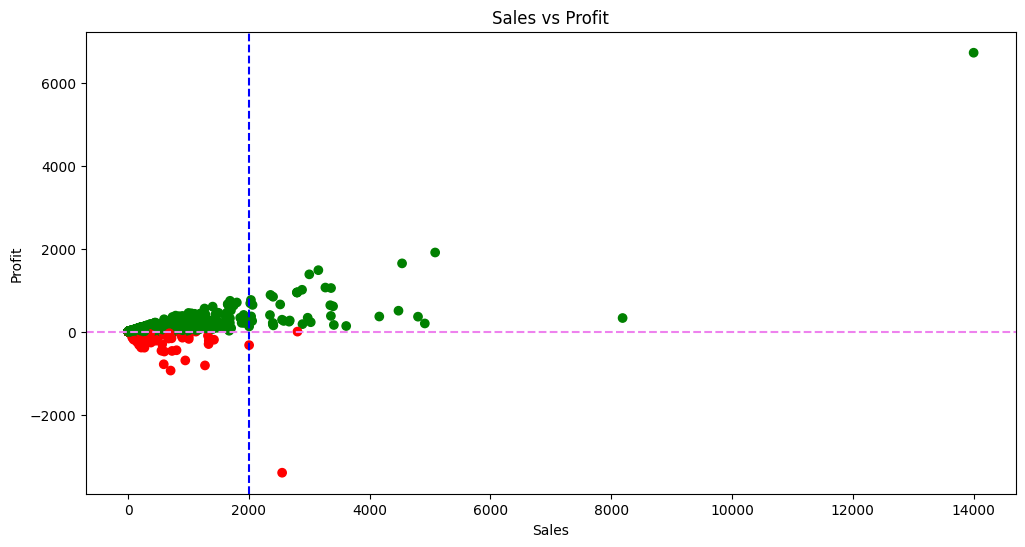

In [ ]:
plt.figure(figsize = (12,6))

plt.scatter(df['Sales'],df['Profit'] , color = df['Profit'].apply(profit_status))

plt.axhline(y = 0 , color = 'violet' , linestyle = '--')
plt.axvline(x = 2000 , color = 'blue' , linestyle = '--')

plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit')

plt.show()

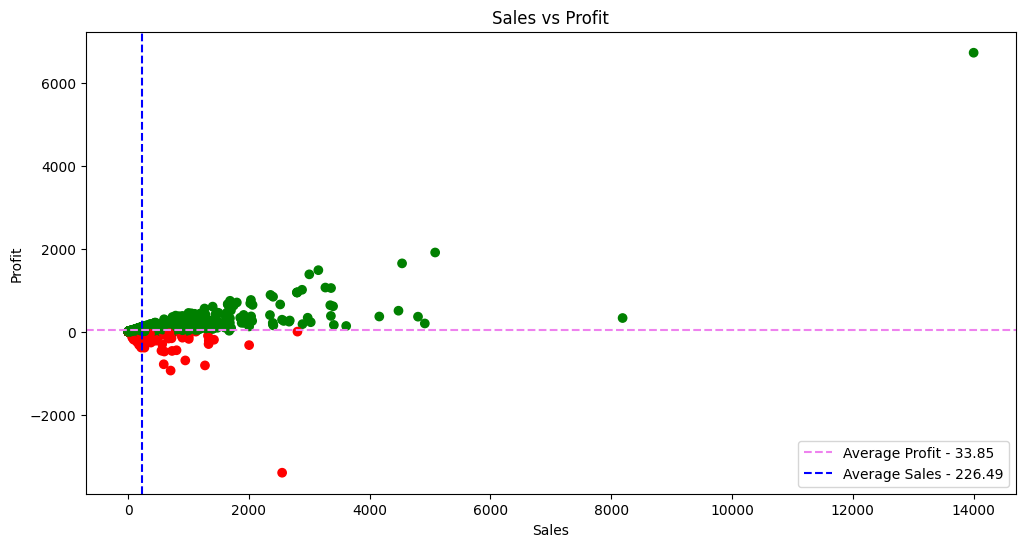

In [ ]:
av_profit = round(df['Profit'].mean(),2)
av_sales = round(df['Sales'].mean(),2)

plt.figure(figsize = (12,6))

plt.scatter(df['Sales'],df['Profit'] , color = df['Profit'].apply(profit_status))

plt.axhline(y = av_profit , color = 'violet' , linestyle = '--' , label = f"Average Profit - {av_profit}")
plt.axvline(x = av_sales , color = 'blue' , linestyle = '--' , label = f"Average Sales - {av_sales}")

plt.legend()
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit')

plt.show()

In [ ]:
cat_profit_loss = df.groupby('Category')['Profit'].sum().reset_index()
cat_profit_loss

,Category,Profit
0,Accessories,16484.62
1,Appliances,8261.29
2,Art,2374.15
3,Binders,16096.78
4,Bookcases,-1646.50
5,Chairs,4027.62
6,Copiers,19327.25
7,Envelopes,1908.71
8,Fasteners,275.19
9,Furnishings,7641.26


In [ ]:
cat_profit_loss['Profit'].apply(lambda x : "red" if x < 0 else "green")

0     green
1     green
2     green
3     green
4       red
5     green
6     green
7     green
8     green
9     green
10    green
11      red
12    green
13    green
14    green
15    green
16    green
Name: Profit, dtype: object

In [ ]:
def profit_color(profit_value):
  if profit_value < 0:
    return 'red'
  elif profit_value < 7000:
    return 'yellow'
  else:
    return 'green'



cat_profit_loss['Profit'].apply(profit_color)

0      green
1      green
2     yellow
3      green
4        red
5     yellow
6      green
7     yellow
8     yellow
9      green
10    yellow
11       red
12     green
13     green
14     green
15    yellow
16    yellow
Name: Profit, dtype: object

In [ ]:
profit_color = lambda profit_value : "red" if profit_value < 0 else "yellow" if profit_value < 7000 else "green"

cat_profit_loss['Profit'].apply(profit_color)

0      green
1      green
2     yellow
3      green
4        red
5     yellow
6      green
7     yellow
8     yellow
9      green
10    yellow
11       red
12     green
13     green
14     green
15    yellow
16    yellow
Name: Profit, dtype: object

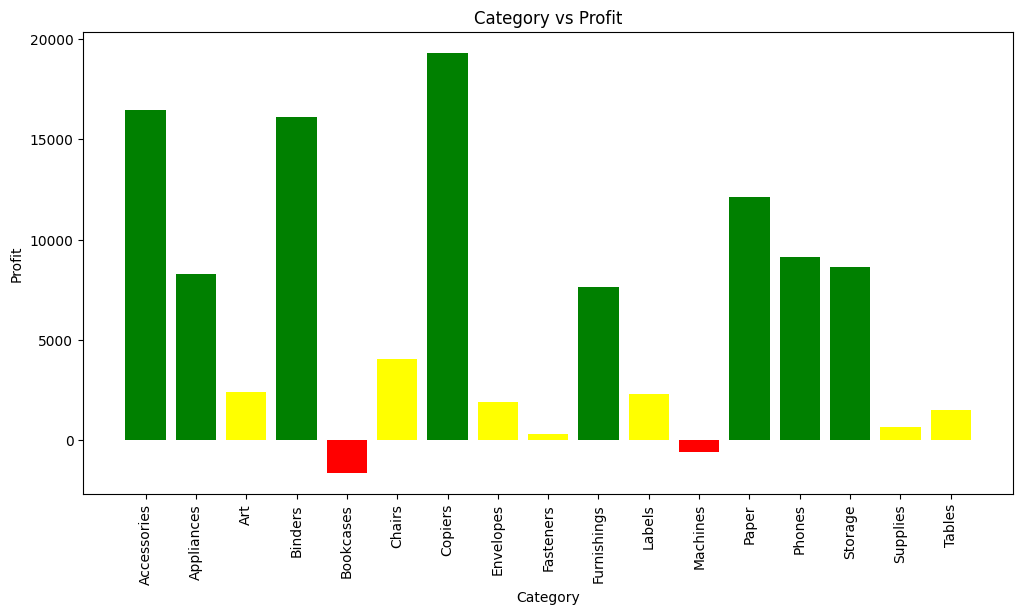

In [ ]:
plt.figure(figsize = (12,6))

plt.bar(cat_profit_loss['Category'],cat_profit_loss['Profit'] ,
        color = cat_profit_loss['Profit'].apply(profit_color))

plt.xticks(rotation = 90)

plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Category vs Profit')

plt.show()

**Pivot Table**

In [ ]:
df.head(3)

,Order ID,Order Date,Ship Date,ProcessingTime,OrderYear,OrderMonth,OrderDay,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,4 days,2013,6,13,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,2011-06-09,2011-06-14,5 days,2011,6,9,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,2011-06-09,2011-06-14,5 days,2011,6,9,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97


In [ ]:
df['ProcessingTime'] = df['ProcessingTime'].dt.days

In [ ]:
#Total sales, Total Quantity , Average profit , Average processing Time for each category

#df.groupby('Category')[['Sales','Quantity','Profit','ProcessingTime']].agg(['sum','mean'])

table_category  = pd.pivot_table(data = df,
                                 index = 'Category',
                                 values = ['Sales','Profit','Quantity','ProcessingTime'],
                                 aggfunc = {'Sales' : np.sum,
                                            'Quantity' : np.sum,
                                            'Profit' : np.mean,
                                            'ProcessingTime':np.mean})
table_category

,ProcessingTime,Profit,Quantity,Sales
Category,,,,
Accessories,3.980620,63.893876,1032.0,61114.10
Appliances,4.088235,60.744779,492.0,30236.32
Art,4.024000,9.496600,926.0,9212.06
Binders,3.891720,34.175754,1868.0,55961.11
Bookcases,3.525000,-20.581250,306.0,36004.18
Chairs,3.821256,19.457101,734.0,101781.36
Copiers,3.240000,773.090000,88.0,49749.23
Envelopes,3.925373,28.488209,227.0,4118.10
Fasteners,3.819444,3.822083,263.0,923.20


In [ ]:
color_matrix = lambda value : 'red' if value < 0 else 'green'

color_values = table_category['Profit'].apply(color_matrix)

#color_values

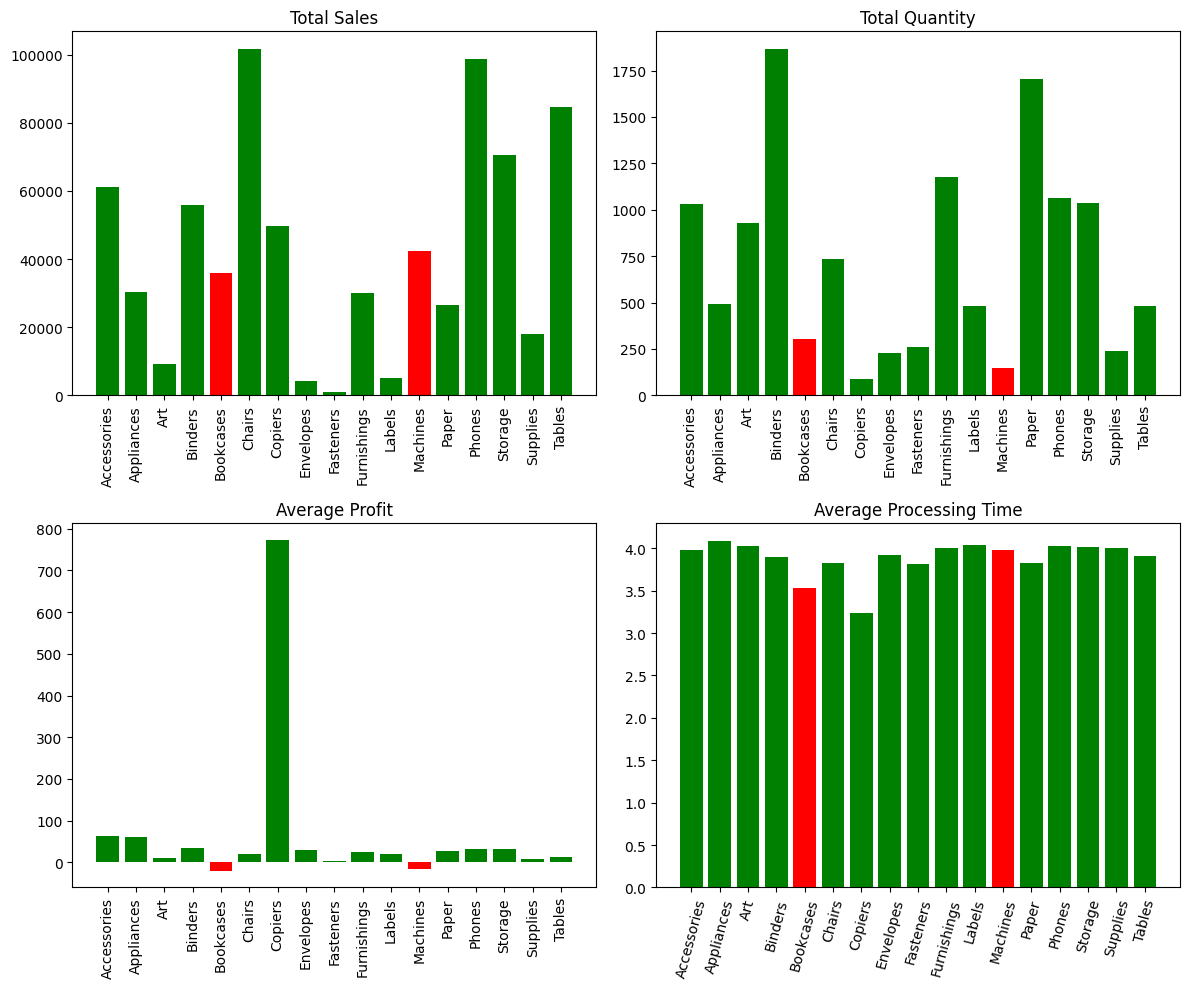

In [ ]:
plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
plt.bar(table_category.index,table_category['Sales'],
        color = color_values)
plt.xticks(rotation = 90)
plt.title('Total Sales')

plt.subplot(2,2,2)
plt.bar(table_category.index,table_category['Quantity'],
        color = color_values)
plt.xticks(rotation = 90)
plt.title('Total Quantity')


plt.subplot(2,2,3)
plt.bar(table_category.index,table_category['Profit'],
        color = color_values)
plt.xticks(rotation = 90)
plt.title('Average Profit')


plt.subplot(2,2,4)
plt.bar(table_category.index,table_category['ProcessingTime'],
        color = color_values)
plt.xticks(rotation = 75)
plt.title('Average Processing Time')

plt.tight_layout()
plt.show()

**Histogram plot**

In [ ]:
df.head(3)

,Order ID,Order Date,Ship Date,ProcessingTime,OrderYear,OrderMonth,OrderDay,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,4,2013,6,13,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,2011-06-09,2011-06-14,5,2011,6,9,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,2011-06-09,2011-06-14,5,2011,6,9,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97


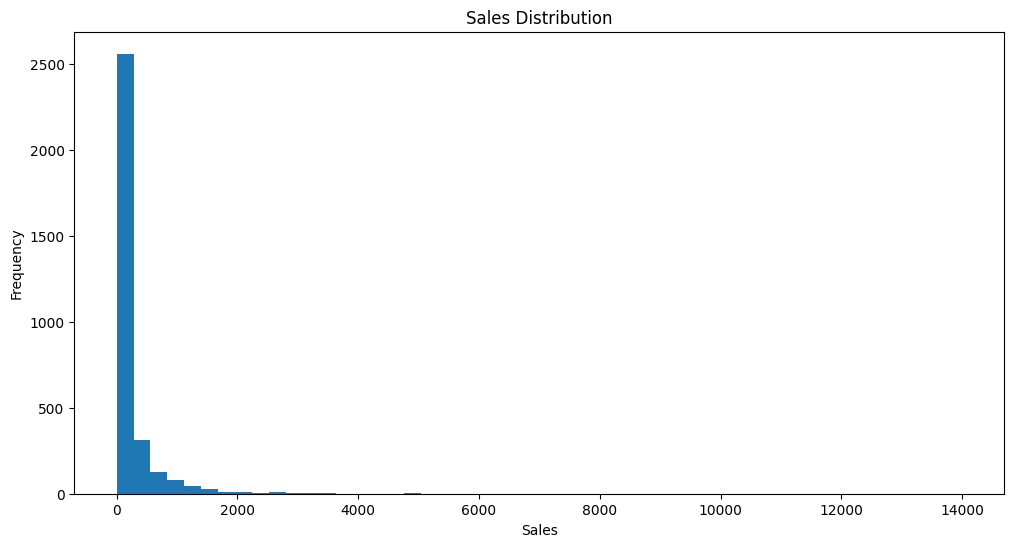

In [ ]:
plt.figure(figsize = (12,6))
plt.hist(df['Sales'] , bins = 50)

plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.show()

In [ ]:
(df['Sales'] <= 500).sum()/len(df)

0.8832344676865439

In [ ]:
(df['Sales'] <= df['Sales'].mean()).sum()/len(df)

0.7589759600374649

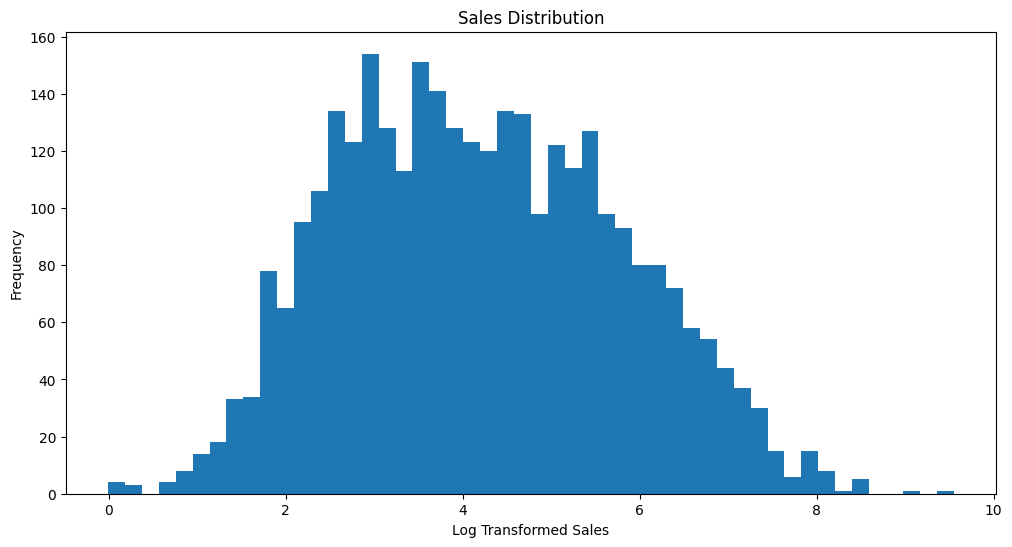

In [ ]:
plt.figure(figsize = (12,6))
plt.hist(np.log(df['Sales']) , bins = 50)

plt.xlabel('Log Transformed Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.show()

In [ ]:
log_sales = np.log(df['Sales'])

(log_sales <= log_sales.mean()).sum()/len(df)

0.5179519200749297

**Statistics**
  * Measure of central tendency - mean, median , mode
  * Measure of Dispersion - standard deviation & variance

In [ ]:
n1 = np.array([1,2,2,3,4,5])
print(np.mean(n1))
print(np.median(n1))

2.8333333333333335
2.5


In [ ]:
n2 = np.array([1,2,2,3,4,5,60])
print(np.mean(n2))
print(np.median(n2))

11.0
3.0


In [ ]:
student_marks = np.array([22,17,28,30,20,26,37,16,26,22,19])
print(student_marks)
print(len(student_marks))

[22 17 28 30 20 26 37 16 26 22 19]
11


In [ ]:
print(np.mean(student_marks))
print(np.median(student_marks))

23.90909090909091
22.0


In [ ]:
variance_marks = ((student_marks - np.mean(student_marks))**2).mean()
variance_marks

35.53719008264463

In [ ]:
std_deviation = np.sqrt(variance_marks)
std_deviation

5.961307749365455

In [ ]:
print(student_marks)

[22 17 28 30 20 26 37 16 26 22 19]


In [ ]:
#Using standard deviantion we find most likelihood region => Majority of data exist
#Calculate region of 1st standard deviation

print(np.mean(student_marks) - std_deviation)
print(np.mean(student_marks) + std_deviation)

17.947783159725454
29.870398658456367


In [ ]:
#Calculate region of 2nd standard deviation

print(np.mean(student_marks) - 2 * std_deviation)
print(np.mean(student_marks) + 2 * std_deviation)

11.98647541036
35.83170640782182


In [ ]:
#Calculate region of 3rdd standard deviation

print(np.mean(student_marks) - 3 * std_deviation)
print(np.mean(student_marks) + 3 * std_deviation)

6.025167660994544
41.79301415718727


In [ ]:
log_sales = np.log(df['Sales'])

std_dev_1_left = log_sales.mean() - log_sales.std()
std_dev_1_right = log_sales.mean() + log_sales.std()

std_dev_2_left = log_sales.mean() - 2 * log_sales.std()
std_dev_2_right = log_sales.mean() + 2 * log_sales.std()

std_dev_3_left = log_sales.mean() - 3 * log_sales.std()
std_dev_3_right = log_sales.mean() + 3 * log_sales.std()

In [ ]:
#%ge of data outside 2nd standard deviation

((log_sales <= std_dev_2_left) | (log_sales >= std_dev_2_right)).sum()/len(log_sales)

0.029035279425538556

In [ ]:
#%ge of data outside 3rd standard deviation

((log_sales <= std_dev_3_left) | (log_sales >= std_dev_3_right)).sum()/len(log_sales)

0.0006244146113019045

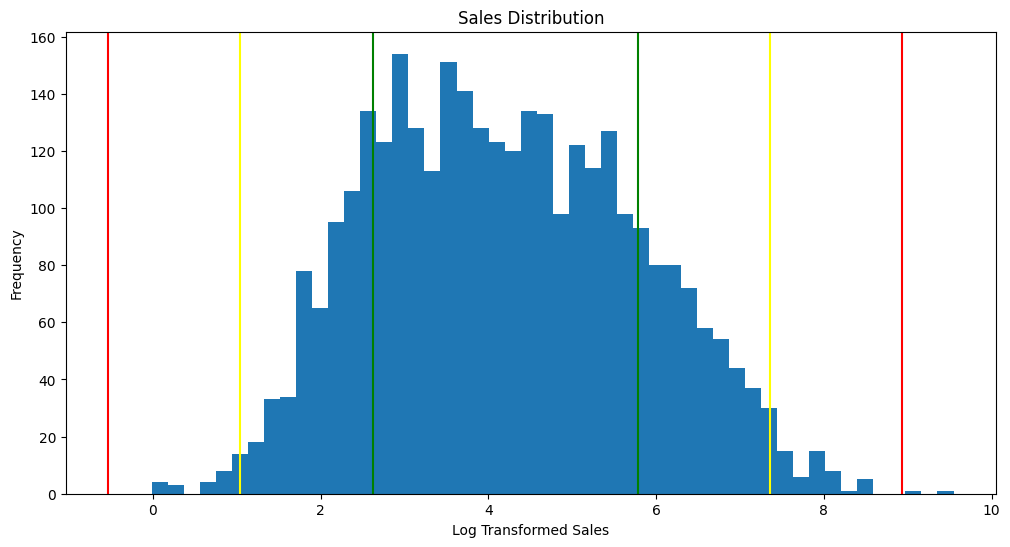

In [ ]:
plt.figure(figsize = (12,6))
plt.hist(log_sales , bins = 50)

plt.axvline(x = std_dev_1_left , color = 'green')
plt.axvline(x = std_dev_1_right , color = 'green')

plt.axvline(x = std_dev_2_left , color = 'yellow')
plt.axvline(x = std_dev_2_right , color = 'yellow')

plt.axvline(x = std_dev_3_left , color = 'red')
plt.axvline(x = std_dev_3_right , color = 'red')

plt.xlabel('Log Transformed Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.show()

**Box Plot**

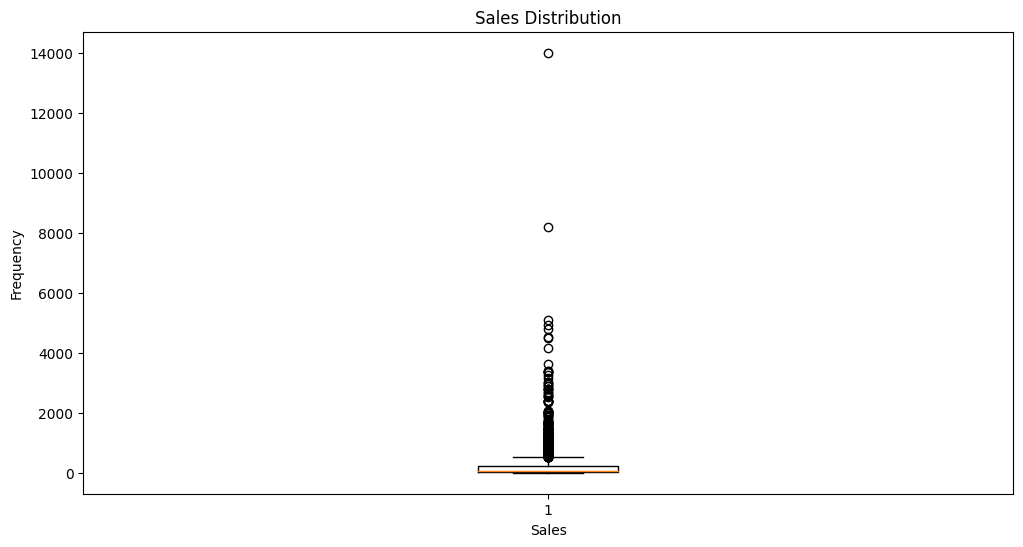

In [ ]:
plt.figure(figsize = (12,6))
plt.boxplot(df['Sales'])

plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.show()

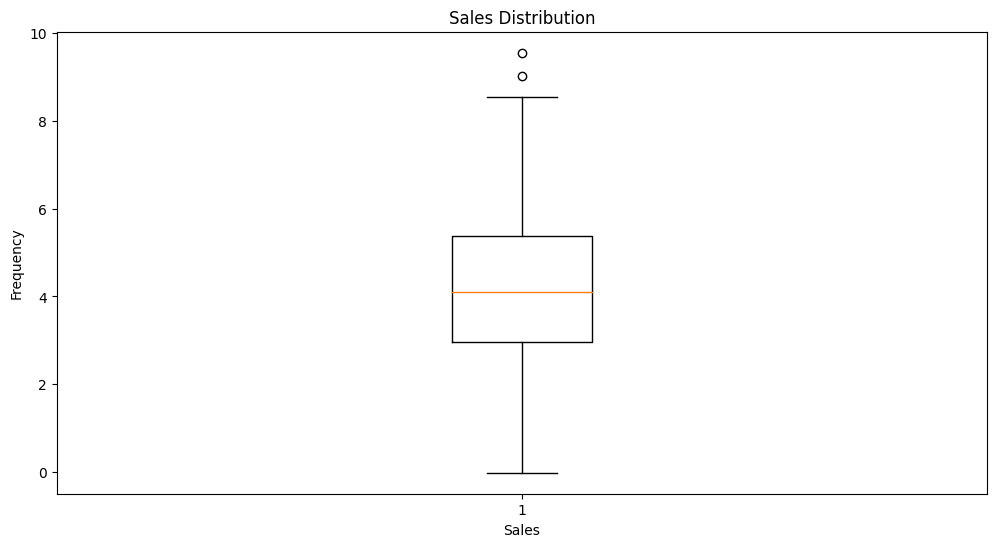

In [ ]:
plt.figure(figsize = (12,6))
plt.boxplot(log_sales)

plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.show()

In [ ]:
log_sales.describe()

count    3203.000000
mean        4.202271
std         1.578391
min        -0.010050
25%         2.967333
50%         4.108247
75%         5.374398
max         9.546810
Name: Sales, dtype: float64

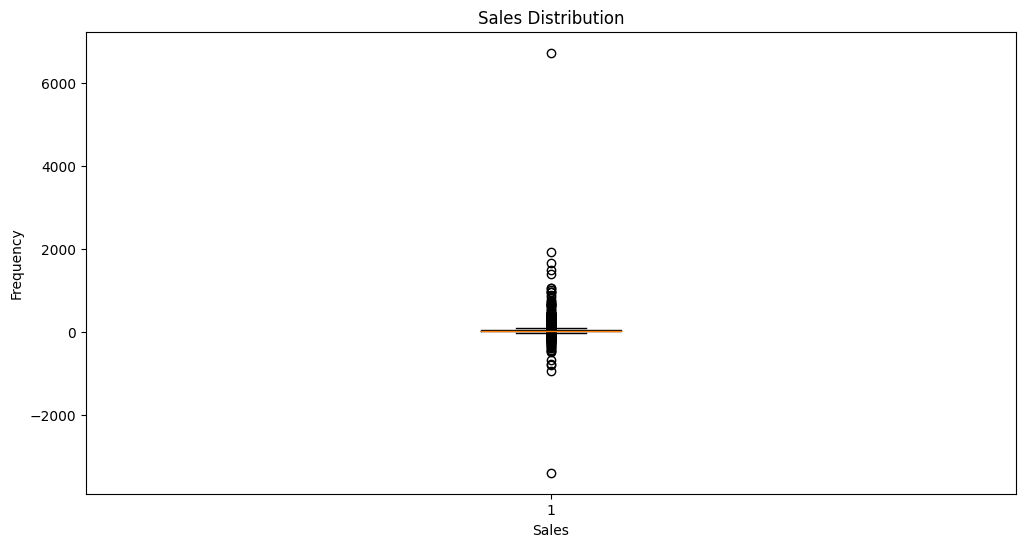

In [ ]:
plt.figure(figsize = (12,6))
plt.boxplot(df['Profit'])

plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.show()

In [ ]:
df['Profit'].describe()

count    3203.000000
mean       33.849138
std       174.109155
min     -3399.980000
25%         3.850000
50%        11.170000
75%        33.000000
max      6719.980000
Name: Profit, dtype: float64

In [ ]:
q1 = df['Profit'].quantile(0.25)
q3 = df['Profit'].quantile(0.75)

iqr = q3 - q1

lower_fence_profit = q1 - 1.5 * iqr
upper_fence_profit = q3 + 1.5 * iqr

print(lower_fence_profit)
print(upper_fence_profit)

print()

print(((df['Profit'] <= upper_fence_profit) & (df['Profit'] >= lower_fence_profit)).sum()/len(df))

-39.87499999999999
76.725

0.8548236028723072


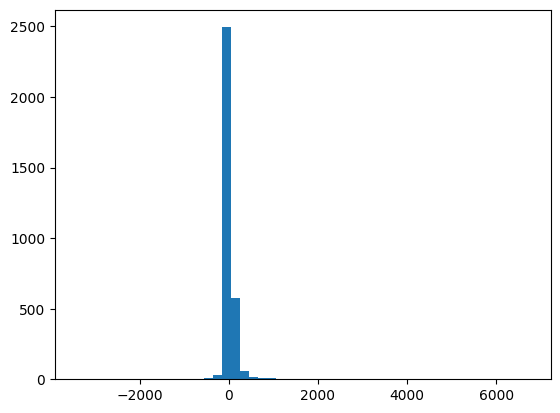

In [ ]:
plt.hist(df['Profit'] , bins = 50)
plt.show()

In [ ]:
profit_2nd_std_left = df['Profit'].mean() - 2 * df['Profit'].std()
profit_2nd_std_right = df['Profit'].mean() + 2 * df['Profit'].std()

print(profit_2nd_std_left)
print(profit_2nd_std_right)

print()

print(((df['Profit'] <= profit_2nd_std_right) & (df['Profit'] >= profit_2nd_std_left)).sum()/len(df))

-314.36917074383155
382.0674473595044

0.9815797689665938


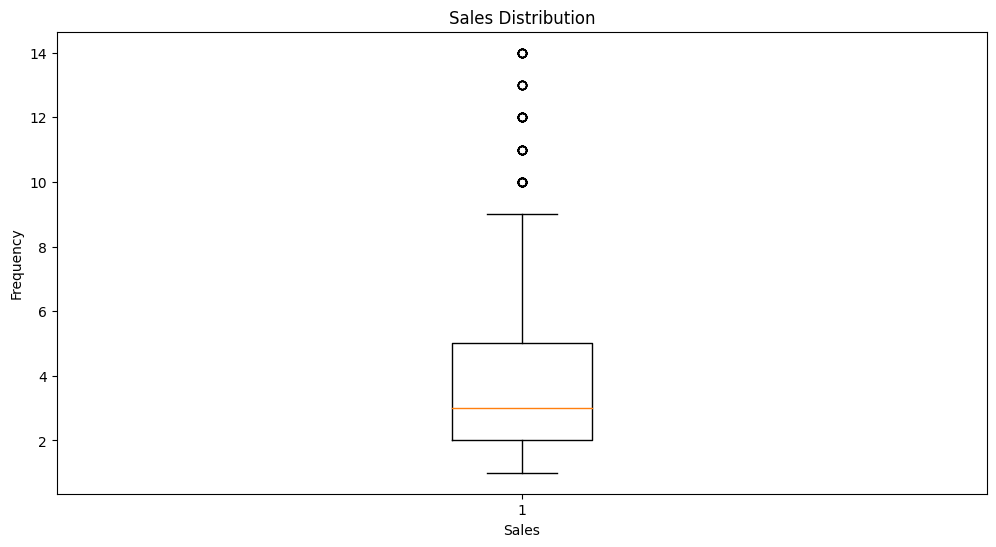

In [ ]:
plt.figure(figsize = (12,6))
plt.boxplot(df['Quantity'])

plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.show()

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,ProcessingTime,OrderYear,OrderMonth,OrderDay,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,4,2013,6,13,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,2011-06-09,2011-06-14,5,2011,6,9,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,2011-06-09,2011-06-14,5,2011,6,9,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,2011-06-09,2011-06-14,5,2011,6,9,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,2011-06-09,2011-06-14,5,2011,6,9,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [ ]:
#seperate all numerical columns data

df_number = df.select_dtypes(include = 'number')
df_number.head()

,ProcessingTime,OrderYear,OrderMonth,OrderDay,Sales,Quantity,Profit
0,4,2013,6,13,14.62,2.0,6.87
1,5,2011,6,9,48.86,7.0,14.17
2,5,2011,6,9,7.28,4.0,1.97
3,5,2011,6,9,907.15,4.0,90.72
4,5,2011,6,9,18.50,3.0,5.78


In [ ]:
df_number.corr()

,ProcessingTime,OrderYear,OrderMonth,OrderDay,Sales,Quantity,Profit
ProcessingTime,1.000000,-0.037872,-0.030446,0.004763,-0.019958,0.047754,-0.028638
OrderYear,-0.037872,1.000000,-0.053184,-0.051944,0.005652,0.011768,0.019781
OrderMonth,-0.030446,-0.053184,1.000000,-0.096645,-0.033206,0.009203,-0.032957
OrderDay,0.004763,-0.051944,-0.096645,1.000000,0.008540,-0.003476,0.005348
Sales,-0.019958,0.005652,-0.033206,0.008540,1.000000,0.214665,0.647477
Quantity,0.047754,0.011768,0.009203,-0.003476,0.214665,1.000000,0.093240
Profit,-0.028638,0.019781,-0.032957,0.005348,0.647477,0.093240,1.000000


<Axes: >

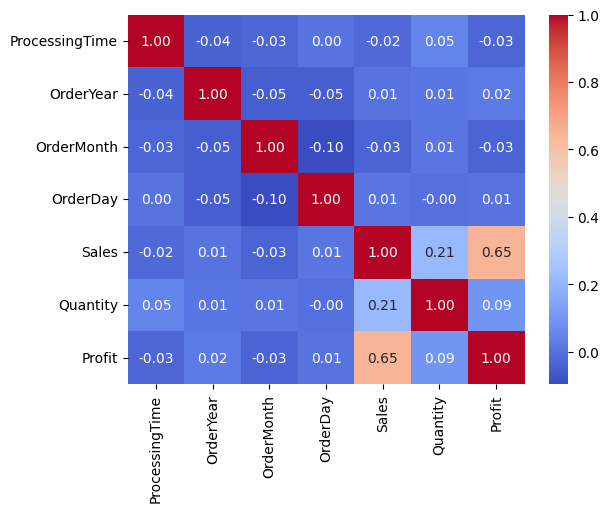

In [ ]:
import seaborn as sns
sns.heatmap(df_number.corr(), annot=True , fmt='.2f', cmap='coolwarm')